In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\jayas\Downloads\test.csv")

In [3]:
df.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [4]:
df.isna().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [5]:
df.shape

(5244, 14)

In [6]:
df.describe()

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,5244.000000,5041.000000,5244.000000,5244.000000,5244.000000,5176.000000,5244.000000,5244.000000,5244.000000,5058.000000,5244.000000
mean,10507.372616,4.011089,1378.657895,2988.580092,415.491037,1557.443199,639.785469,356.356789,154.139969,270.397786,0.604500
std,5978.658892,0.301915,1280.630070,12881.253715,1910.726669,6583.766998,2991.065223,1632.732834,611.006799,1035.085288,0.489004
min,0.000000,0.000000,139.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5286.750000,3.900000,699.000000,66.000000,9.000000,32.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10561.500000,4.000000,999.000000,307.000000,44.000000,156.000000,61.000000,34.000000,16.000000,29.000000,1.000000
75%,15636.750000,4.200000,1299.000000,1428.000000,214.250000,764.250000,310.250000,166.000000,75.000000,131.000000,1.000000
max,20964.000000,5.000000,15999.000000,289973.000000,45448.000000,151193.000000,74037.000000,49924.000000,12629.000000,23139.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5041 non-null   float64
 3   maincateg   5177 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5176 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5058 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'title':
['Casuals For Men\xa0\xa0(Blue)' 'Women Black Flats Sandal'
 'Women Gold Wedges Sandal' ... 'AA001 Boots For Men\xa0\xa0(Black)'
 "Women Girl's Fashion Trendy Comfortable Slip On Sneakers For Women\xa0\xa0(Green)"
 'Womens Casual Comfort Stylish Black High Heel With Silver Strap Flip Flops']

Unique values in 'maincateg':
['Men' 'Women' nan]

Unique values in 'platform':
['Flipkart' 'Amazon']


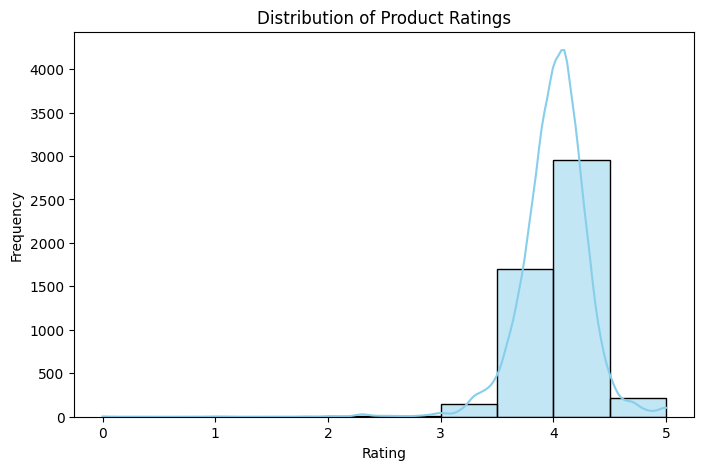

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

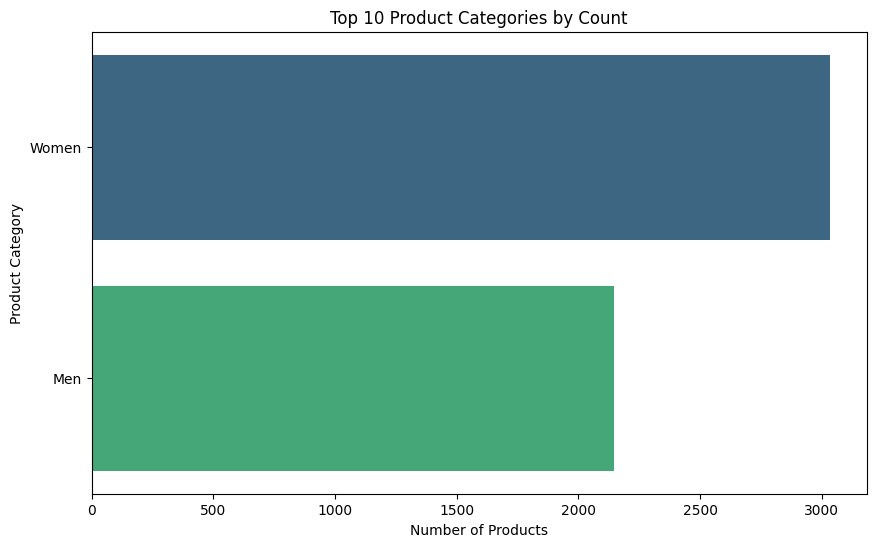

In [10]:
if 'maincateg' in df.columns:
    top_categories = df['maincateg'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.title('Top 10 Product Categories by Count')
    plt.xlabel('Number of Products')
    plt.ylabel('Product Category')
    plt.show()

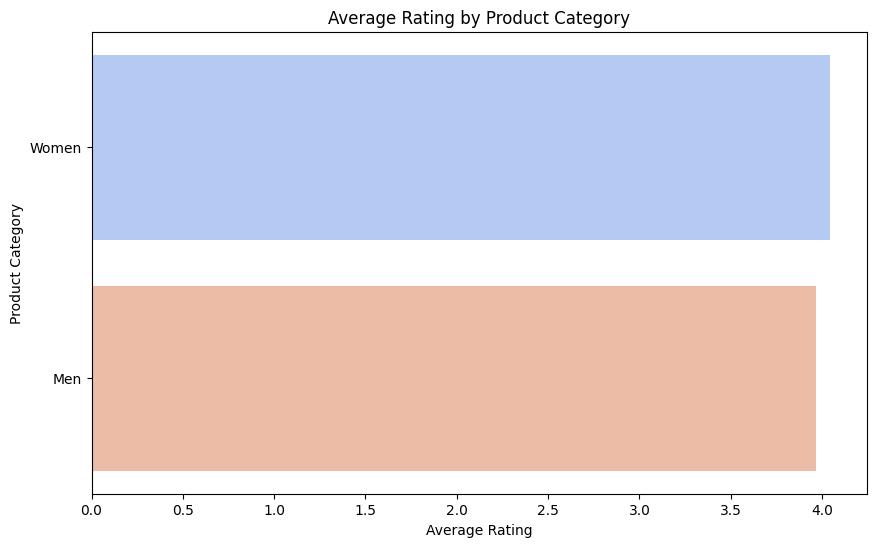

In [11]:
if 'maincateg' in df.columns:
    avg_rating_by_category = df.groupby('maincateg')['Rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='coolwarm')
    plt.title('Average Rating by Product Category')
    plt.xlabel('Average Rating')
    plt.ylabel('Product Category')
    plt.show()

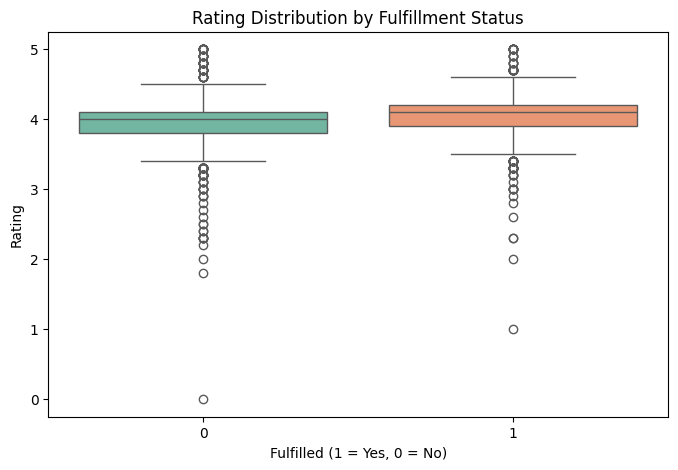

In [12]:
if 'fulfilled1' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='fulfilled1', y='Rating', data=df, palette='Set2')
    plt.title('Rating Distribution by Fulfillment Status')
    plt.xlabel('Fulfilled (1 = Yes, 0 = No)')
    plt.ylabel('Rating')
    plt.show()

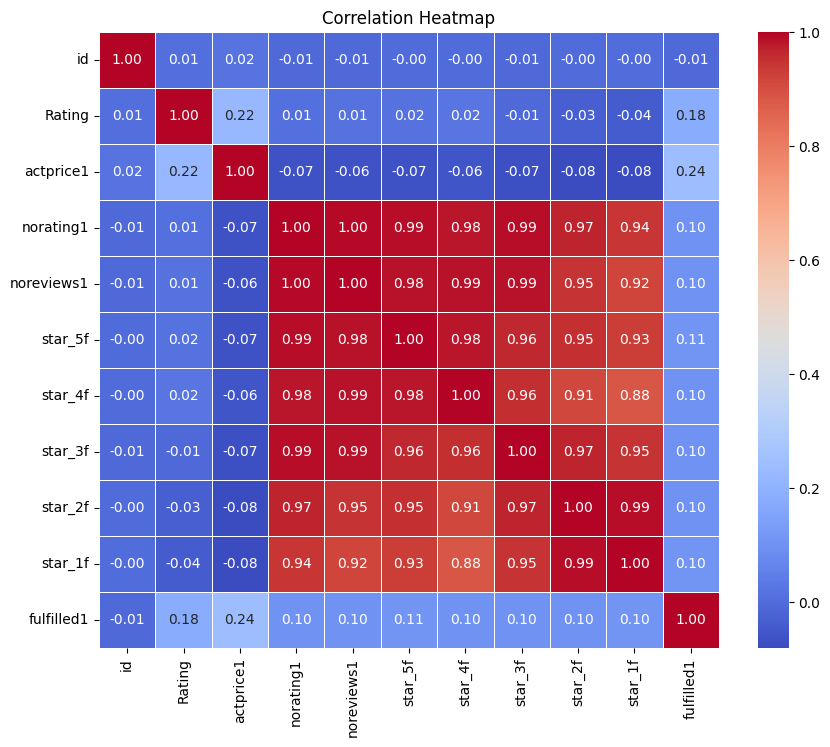

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [14]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [15]:
if 'star_5f' in df.columns:
    df['star_5f'].fillna(0, inplace=True)
if 'star_1f' in df.columns:
    df['star_1f'].fillna(0, inplace=True)

In [16]:
df.isna().sum()

id             0
title          0
Rating         0
maincateg     67
platform       0
actprice1      0
norating1      0
noreviews1     0
star_5f        0
star_4f        0
star_3f        0
star_2f        0
star_1f        0
fulfilled1     0
dtype: int64

In [17]:
df['maincateg'].fillna('Unknown', inplace=True)

In [18]:
most_frequent_category = df['maincateg'].mode()[0]
df['maincateg'].fillna(most_frequent_category, inplace=True)

In [19]:
df = df[df['maincateg'].notnull()]

In [20]:
df.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

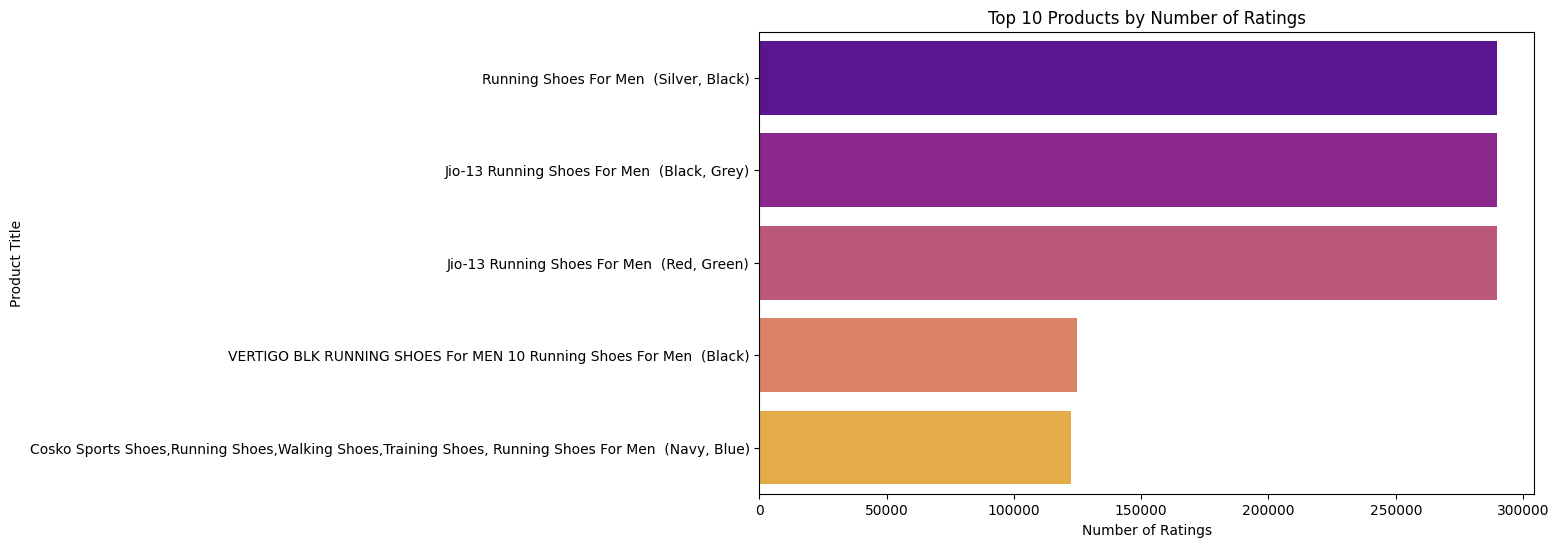

In [21]:
if 'title' in df.columns and 'norating1' in df.columns:
    top_rated_products = df.nlargest(10, 'norating1')[['title', 'norating1']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_rated_products['norating1'], y=top_rated_products['title'], palette='plasma')
    plt.title('Top 10 Products by Number of Ratings')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Product Title')
    plt.show()

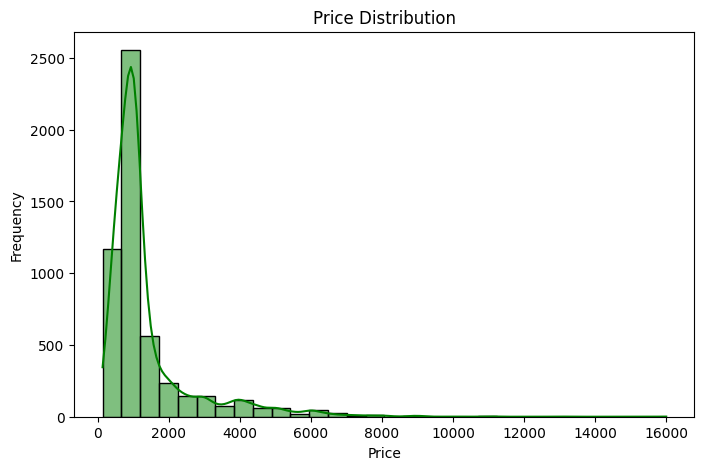

In [22]:
if 'actprice1' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['actprice1'], bins=30, kde=True, color='green')
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

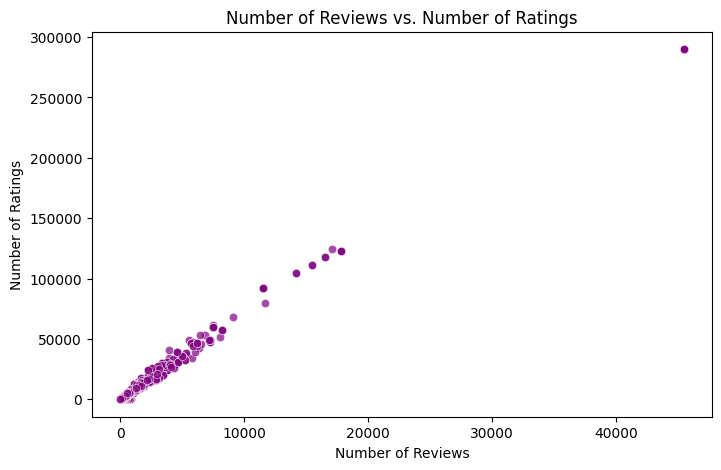

In [23]:
if 'noreviews1' in df.columns and 'norating1' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='noreviews1', y='norating1', data=df, alpha=0.7, color='purple')
    plt.title('Number of Reviews vs. Number of Ratings')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Number of Ratings')
    plt.show()

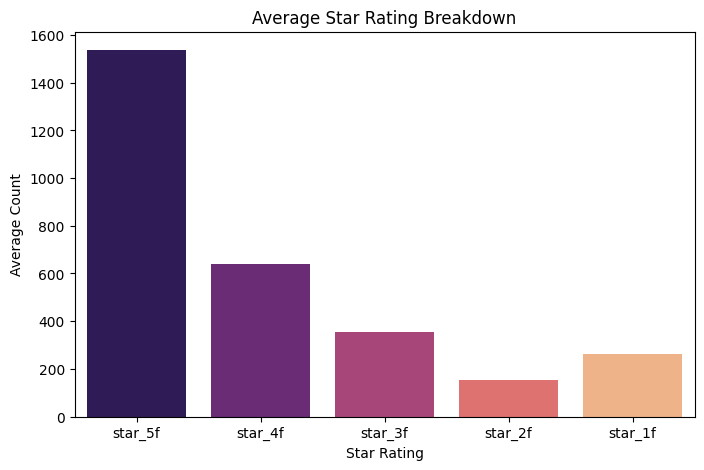

In [24]:
star_columns = ['star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f']
if all(col in df.columns for col in star_columns):
    star_data = df[star_columns].mean()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=star_data.index, y=star_data.values, palette='magma')
    plt.title('Average Star Rating Breakdown')
    plt.xlabel('Star Rating')
    plt.ylabel('Average Count')
    plt.show()

In [25]:
df.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [26]:
df = df[['id','title','Rating','maincateg','platform']]

In [27]:
df.head()

,id,title,Rating,maincateg,platform
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart


In [28]:
df.isna().sum()

id           0
title        0
Rating       0
maincateg    0
platform     0
dtype: int64

<Axes: xlabel='Rating', ylabel='title'>

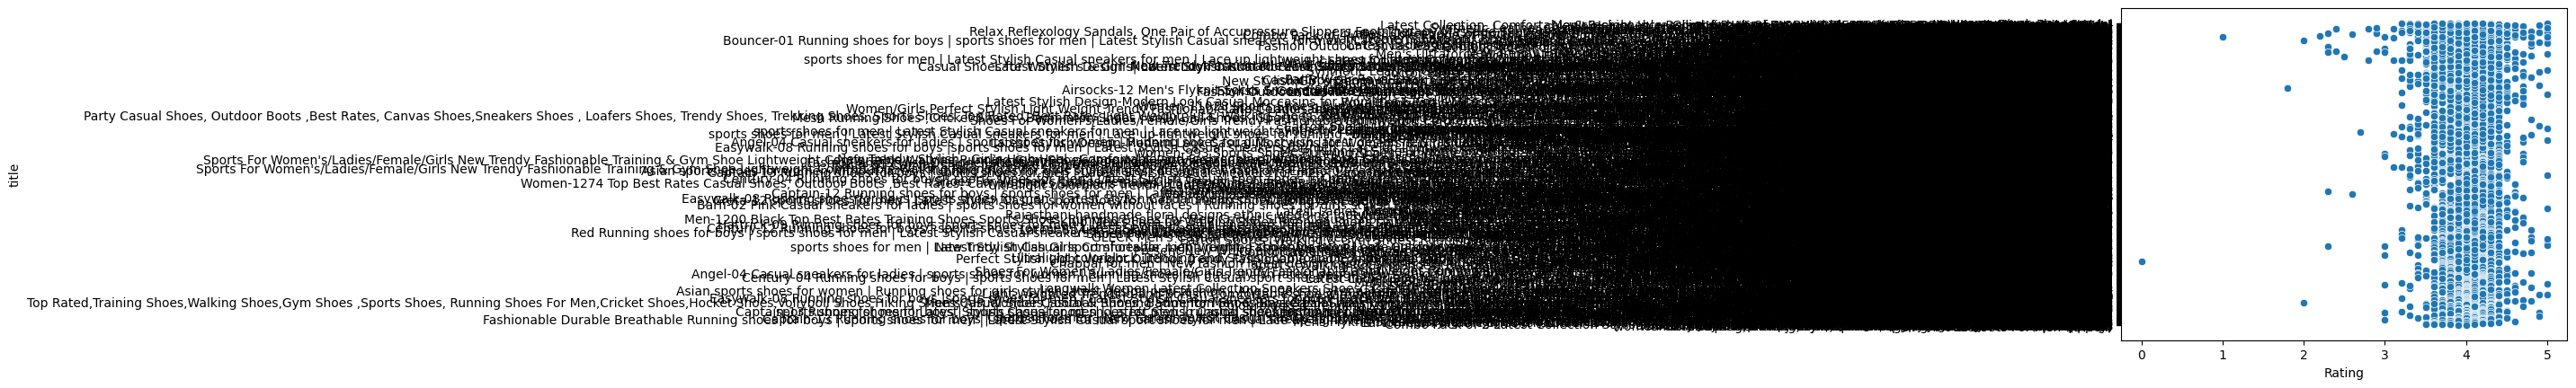

In [29]:
sns.scatterplot(df,x="Rating",y="title")

In [32]:
df.head()

,id,title,Rating,maincateg,platform
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart


In [35]:
user_item_matrix = df.pivot_table(index='id', columns='title', values='Rating', fill_value=0)
print('Shape of user_item_matrix: ', user_item_matrix.shape)

# Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(user_item_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

# Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = user_item_matrix.shape[0] * user_item_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

# Density of ratings
density = (given_num_of_ratings / possible_num_of_ratings) * 100
print('density: {:4.2f}%'.format(density))

user_item_matrix.head()


Shape of user_item_matrix:  (5244, 2383)
given_num_of_ratings =  5243
possible_num_of_ratings =  12496452
density: 0.04%


title,0,0154 Derby For Men (Black),0159 Slip On For Men (Black),0160 Slip On For Men (Black),0224 Slip On For Men (Black),0257 Slip On For Men (Brown),100% Comfort Extra soft Slippers for Women Flip Flops,100% Pure Leather Police Shoes For Men (Black),"101 loafer Loafers For Men (Black, Yellow)",1010 Jutis For Men (Brown),...,"sports shoes for men | Latest Stylish Casual sport shoes for men | running shoes for boys | Lace up Lightweight black shoes for running, walking, gym, trekking, hiking & party Running Shoes For Men (Grey, Yellow)",strap bellie Bellies For Women (Pink),synthetic Leather Bellies For Women (Black),synthetic Leather Bellies For Women (Tan),women comfortable Tie Lycra Bellies For Women (Maroon),women comfortable plane lycra bellies Bellies For Women (Black),women plan boots Boots For Women (Black),women's casual shoes combo pack of 2 Casuals For Women (Multicolor),"women's casual shoes combo pack of 2 Sneakers For Women (Red, Blue)",Bellies For Women( beige stone) Bellies For Women (Beige)
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Ensure 'Rating' is numeric and handle non-numeric values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with NaN ratings
df_final = df.dropna(subset=['Rating'])

# Calculate the average rating for each product (by 'prod_id')
average_rating = df_final.groupby('id')['Rating'].mean()

# Calculate the count of ratings for each product (by 'prod_id')
count_rating = df_final.groupby('id')['Rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

# Sort the dataframe by the average rating
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

# Show the top rows of the dataframe
final_rating.head()


,avg_rating,rating_count
id,,
17129,5.0,1
2446,5.0,1
15536,5.0,1
18848,5.0,1
13090,5.0,1


In [55]:
user_item_matrix.head()

title,0,0154 Derby For Men (Black),0159 Slip On For Men (Black),0160 Slip On For Men (Black),0224 Slip On For Men (Black),0257 Slip On For Men (Brown),100% Comfort Extra soft Slippers for Women Flip Flops,100% Pure Leather Police Shoes For Men (Black),"101 loafer Loafers For Men (Black, Yellow)",1010 Jutis For Men (Brown),...,"sports shoes for men | Latest Stylish Casual sport shoes for men | running shoes for boys | Lace up Lightweight black shoes for running, walking, gym, trekking, hiking & party Running Shoes For Men (Grey, Yellow)",strap bellie Bellies For Women (Pink),synthetic Leather Bellies For Women (Black),synthetic Leather Bellies For Women (Tan),women comfortable Tie Lycra Bellies For Women (Maroon),women comfortable plane lycra bellies Bellies For Women (Black),women plan boots Boots For Women (Black),women's casual shoes combo pack of 2 Casuals For Women (Multicolor),"women's casual shoes combo pack of 2 Sneakers For Women (Red, Blue)",Bellies For Women( beige stone) Bellies For Women (Beige)
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
user_item_matrix['user_index'] = np.arange(0, user_item_matrix.shape[0])
user_item_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
user_item_matrix.head()

title,0,0154 Derby For Men (Black),0159 Slip On For Men (Black),0160 Slip On For Men (Black),0224 Slip On For Men (Black),0257 Slip On For Men (Brown),100% Comfort Extra soft Slippers for Women Flip Flops,100% Pure Leather Police Shoes For Men (Black),"101 loafer Loafers For Men (Black, Yellow)",1010 Jutis For Men (Brown),...,"sports shoes for men | Latest Stylish Casual sport shoes for men | running shoes for boys | Lace up Lightweight black shoes for running, walking, gym, trekking, hiking & party Running Shoes For Men (Grey, Yellow)",strap bellie Bellies For Women (Pink),synthetic Leather Bellies For Women (Black),synthetic Leather Bellies For Women (Tan),women comfortable Tie Lycra Bellies For Women (Maroon),women comfortable plane lycra bellies Bellies For Women (Black),women plan boots Boots For Women (Black),women's casual shoes combo pack of 2 Casuals For Women (Multicolor),"women's casual shoes combo pack of 2 Sneakers For Women (Red, Blue)",Bellies For Women( beige stone) Bellies For Women (Beige)
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):  # .shape[0] gives number of rows
        
        # finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        # Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity]  # Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity]  # Extracting the similarity score from each tuple in the sorted list
   
    # Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score


In [61]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [66]:
similar = similar_users(3,user_item_matrix)[0][0:10]
similar

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]

In [68]:
similar_users(3,user_item_matrix)[1][0:10]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]])]

In [69]:
def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]

In [70]:
recommendations(3,5,user_item_matrix)

['by Walmart Lace Up For Men\xa0\xa0(Gold)',
 "Unistar Men's Boots",
 'Punjabi Silk Ethnic Mojari, Juti, Bellies, Morpankh Design for Woman & Girl Bellies For Women\xa0\xa0(Black)',
 'Women Silver Flats Sandal',
 'Perfect Stylish Girls Casual Shoes Sneakers For Women\xa0\xa0(Pink)']

In [71]:
recommendations(1521,5,user_item_matrix)

['by Walmart Lace Up For Men\xa0\xa0(Gold)',
 "Unistar Men's Boots",
 'Punjabi Silk Ethnic Mojari, Juti, Bellies, Morpankh Design for Woman & Girl Bellies For Women\xa0\xa0(Black)',
 'Walking Shoes,Gym Shoes,Knit Sports Shoes,Training Shoes,Sports Shoes, Running Shoes,Casual Shoes Running Shoes For Men\xa0\xa0(Black)',
 'Women Silver Flats Sandal']

In [72]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(user_item_matrix.values)

In [73]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [74]:

U.shape

(5244, 50)

In [75]:
sigma.shape

(50, 50)

In [76]:

Vt.shape

(50, 2383)

In [78]:

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = user_item_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

In [79]:
import numpy as np

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]   
    
    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [80]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(121,final_ratings_sparse,preds_matrix,5)


Below are the recommended products for user(user_id = 121):

Recommended Products
1720    6.471591e-15
1105    2.821317e-15
527     2.229087e-15
2163    2.140913e-15
2067    2.058431e-15
Name: user_predictions, dtype: float64


In [81]:
recommend_items(100,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 100):

Recommended Products
2069    5.825812e-15
1713    2.053336e-15
2072    1.499618e-15
1105    1.265521e-15
1286    7.096312e-16
2236    6.455879e-16
2121    6.062792e-16
2195    5.877781e-16
208     5.705708e-16
1114    5.315764e-16
Name: user_predictions, dtype: float64


In [83]:
user_item_matrix['user_index'] = np.arange(0, user_item_matrix.shape[0])
user_item_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
user_item_matrix.head()

title,0,0154 Derby For Men (Black),0159 Slip On For Men (Black),0160 Slip On For Men (Black),0224 Slip On For Men (Black),0257 Slip On For Men (Brown),100% Comfort Extra soft Slippers for Women Flip Flops,100% Pure Leather Police Shoes For Men (Black),"101 loafer Loafers For Men (Black, Yellow)",1010 Jutis For Men (Brown),...,"sports shoes for men | Latest Stylish Casual sport shoes for men | running shoes for boys | Lace up Lightweight black shoes for running, walking, gym, trekking, hiking & party Running Shoes For Men (Grey, Yellow)",strap bellie Bellies For Women (Pink),synthetic Leather Bellies For Women (Black),synthetic Leather Bellies For Women (Tan),women comfortable Tie Lycra Bellies For Women (Maroon),women comfortable plane lycra bellies Bellies For Women (Black),women plan boots Boots For Women (Black),women's casual shoes combo pack of 2 Casuals For Women (Multicolor),"women's casual shoes combo pack of 2 Sneakers For Women (Red, Blue)",Bellies For Women( beige stone) Bellies For Women (Beige)
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
average_rating = user_item_matrix.mean()
average_rating.head()

title
0                                0.000953
0154 Derby For Men  (Black)      0.000744
0159 Slip On For Men  (Black)    0.000744
0160 Slip On For Men  (Black)    0.000725
0224 Slip On For Men  (Black)    0.001449
dtype: float64

In [86]:
preds_df.head()

title,0,0154 Derby For Men (Black),0159 Slip On For Men (Black),0160 Slip On For Men (Black),0224 Slip On For Men (Black),0257 Slip On For Men (Brown),100% Comfort Extra soft Slippers for Women Flip Flops,100% Pure Leather Police Shoes For Men (Black),"101 loafer Loafers For Men (Black, Yellow)",1010 Jutis For Men (Brown),...,"sports shoes for men | Latest Stylish Casual sport shoes for men | running shoes for boys | Lace up Lightweight black shoes for running, walking, gym, trekking, hiking & party Running Shoes For Men (Grey, Yellow)",strap bellie Bellies For Women (Pink),synthetic Leather Bellies For Women (Black),synthetic Leather Bellies For Women (Tan),women comfortable Tie Lycra Bellies For Women (Maroon),women comfortable plane lycra bellies Bellies For Women (Black),women plan boots Boots For Women (Black),women's casual shoes combo pack of 2 Casuals For Women (Multicolor),"women's casual shoes combo pack of 2 Sneakers For Women (Red, Blue)",Bellies For Women( beige stone) Bellies For Women (Beige)
0,1.798328e-33,6.032664e-34,1.103193e-33,1.301606e-33,3.555511e-33,1.288561e-34,2.848396e-33,8.678353e-34,1.973728e-33,2.172903e-35,...,1.218171e-35,2.925005e-35,1.234930e-34,2.665939e-35,8.718701e-34,1.975983e-33,8.628653e-35,4.138525e-34,9.517764e-34,2.314536e-35
1,1.847147e-34,1.252743e-34,2.715612e-34,7.484073e-34,1.542992e-34,2.030262e-35,2.063400e-35,2.685135e-34,3.366205e-34,2.410934e-35,...,3.858851e-34,6.215730e-36,8.477611e-34,8.489575e-34,1.720136e-34,6.618158e-34,3.232864e-35,9.766596e-35,2.047595e-34,1.784894e-34
2,1.777952e-35,5.940876e-35,1.278833e-34,3.867628e-34,1.231815e-34,9.178609e-36,9.175128e-35,9.422817e-35,1.161193e-34,1.535506e-35,...,1.848920e-34,2.807970e-36,4.102203e-34,4.086962e-34,8.380246e-35,3.540156e-34,1.567236e-35,4.524791e-35,9.764550e-35,8.550745e-35
3,1.250757e-34,3.962035e-35,1.596596e-35,6.619232e-34,1.727764e-34,1.387789e-35,6.820726e-35,7.958364e-34,3.510017e-34,1.932428e-35,...,6.267995e-34,1.411705e-36,1.353004e-33,1.368273e-33,3.572255e-35,1.119527e-33,6.001623e-35,3.191456e-35,6.916534e-35,2.860505e-34
4,2.572253e-32,2.867145e-32,3.994638e-32,5.731627e-32,1.690760e-33,2.866341e-33,2.233755e-32,2.636868e-32,7.032293e-32,1.668110e-33,...,2.850034e-32,1.302189e-33,6.220109e-32,6.095328e-32,4.195346e-32,9.605659e-33,1.744203e-33,2.041851e-32,4.742847e-32,1.305364e-32


In [87]:

avg_preds=preds_df.mean()
avg_preds.head()
     

title
0                                3.221125e-18
0154 Derby For Men  (Black)      1.590370e-18
0159 Slip On For Men  (Black)    3.151193e-18
0160 Slip On For Men  (Black)    5.677201e-18
0224 Slip On For Men  (Black)    2.453152e-18
dtype: float64

In [88]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
title,,
0,0.000953,3.221125e-18
0154 Derby For Men (Black),0.000744,1.590370e-18
0159 Slip On For Men (Black),0.000744,3.151193e-18
0160 Slip On For Men (Black),0.000725,5.677201e-18
0224 Slip On For Men (Black),0.001449,2.453152e-18


In [89]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.001637092941105407 

